In [1]:
%cd "~/moses-incons-pen-xp"
%load_ext autoreload
%autoreload 2

/home/xabush/moses-incons-pen-xp


In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
from utils import *

Load the binarized dataset for studies where the patients took tamoxifen

In [3]:
tamofixen_df = pd.read_csv("https://mozi.ai/datasets/cancer/tamoxifen_set/data/tamoxBinary.csv.xz")
display_df_info(tamofixen_df)

Dataset dims (642, 8833)


,posOutcome,MAGEA12,MAGEA11,KLF1,ADH7,MSH4,BIRC3,AKR1C4,GBX2,GCGR,...,ZNF80,ZNF83,ZNF84,ZNF91,ZNHIT2,ZSCAN2,ZXDC,ZYX,ZZEF1,ZZZ3
0,0,0,0,0,1,0,1,1,1,1,...,0,0,0,1,1,0,0,1,0,0
1,1,1,0,0,0,0,0,1,0,1,...,0,0,0,1,1,0,0,1,0,1
2,0,0,0,0,1,0,0,1,1,1,...,0,0,0,1,1,0,0,1,0,0
3,0,0,0,0,0,0,0,1,1,1,...,0,0,0,1,0,0,0,1,0,0
4,1,0,0,0,0,0,1,1,1,1,...,0,0,0,1,1,0,0,1,0,0


Select the top 100 differentially expressed genes

<AxesSubplot:xlabel='AveExpr', ylabel='Count'>

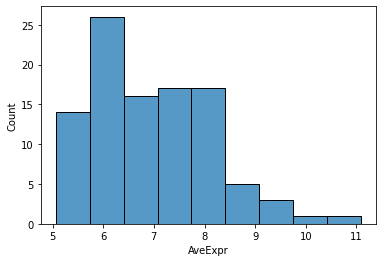

In [5]:
##Load the 4300+ features that have a mean differential expression above 5
feats_top_diff_df = pd.read_csv("https://mozi.ai/datasets/cancer/tamoxifen_set/data/top100genes4studiesFiltered.csv")

sns.histplot(data=feats_top_diff_df["AveExpr"])

In [9]:
#Remove the f.f genes as they can't be found in the intensional sim matrix
not_found_feats = ['PHF15', 'MARS', 'IMPAD1', 'ATP5I', 'FAM49B', 'CTSO', 'HIST3H2A', 'ATP5E', 'HN1', 'BRF2', 'UFD1L']
feats_top_100_diff = feats_top_diff_df["symbol"].to_list()
feats_top_89_diff = [x for x in feats_top_100_diff if x not in not_found_feats]

Load the intensional similarity matrix between 4382 genes which are have a mean expression above 5

In [7]:
intensional_sim_df = pd.read_csv("https://mozi.ai/datasets/cancer/tamoxifen_set/gene_exps/intensional_similarity_2021-05-12.tsv", sep="\t", index_col="node_ID")
intensional_sim_df.columns = intensional_sim_df.index.to_list()

In [12]:
intensional_sim_top_df = intensional_sim_df[feats_top_89_diff]
intensional_sim_top_df = intensional_sim_top_df.loc[feats_top_89_diff]
intensional_sim_top_df.head()

,CCDC59,COX7A2,MB,CDKN3,NUCKS1,RBBP8,AURKA,MRPL13,ENY2,RNF7,...,STK3,RBX1,DDIT3,SF3B5,H6PD,PDCD5,SCFD1,PDLIM1,IMPA1,HSPE1
node_ID,,,,,,,,,,,,,,,,,,,,,
CCDC59,1.000000,0.019483,0.023657,0.101023,0.052632,0.055024,0.028089,0.115620,0.050755,0.132147,...,0.037592,0.033334,0.027246,0.188471,0.051620,0.019226,0.003422,0.003359,0.027232,0.041659
COX7A2,0.019483,1.000000,0.022083,0.081420,0.023979,0.023400,0.031211,0.043520,0.036966,0.018341,...,0.039305,0.050790,0.036910,0.014139,0.082838,0.014702,0.067776,0.037626,0.045167,0.019835
MB,0.023657,0.022083,1.000000,0.007460,0.023144,0.041989,0.028790,0.015488,0.015680,0.043666,...,0.048312,0.020041,0.032893,0.023547,0.021341,0.062783,0.083692,0.094388,0.024849,0.128301
CDKN3,0.101023,0.081420,0.007460,1.000000,0.053039,0.126520,0.085399,0.107108,0.078236,0.119448,...,0.146266,0.092778,0.049550,0.037766,0.085691,0.076103,0.029751,0.033487,0.098979,0.063002
NUCKS1,0.052632,0.023979,0.023144,0.053039,1.000000,0.218844,0.080918,0.101257,0.204263,0.043685,...,0.126201,0.143116,0.167492,0.085049,0.043380,0.081956,0.035510,0.166841,0.018105,0.075782


<AxesSubplot:xlabel='COX7A2', ylabel='Count'>

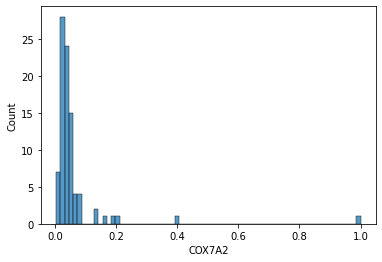

In [30]:
sns.histplot(intensional_sim_top_df["COX7A2"])

In [17]:
convert_dataframe_to_atomese(intensional_sim_top_df, "data/intensional_sim_top_89.scm",
                             node1_type="ConceptNode", node2_type="ConceptNode")

Results saved to data/intensional_sim_top_89.scm


In [14]:
tamofixen_top_89_df = tamofixen_df[feats_top_89_diff + ["posOutcome "]]
tamofixen_top_89_df.to_csv("data/tamoxBinary_top89_genes.csv", index=False)

In [15]:
tamofixen_top_100_df = tamofixen_df[feats_top_100_diff + ["posOutcome"]]
tamofixen_top_100_df.to_csv("data/tamoxBinary_top100_genes.csv", index=False)